<h3> Importing all the required libraries</h3>

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,max_error
from sklearn.model_selection import train_test_split
from gplearn.genetic import SymbolicRegressor, SymbolicTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from gplearn.genetic import SymbolicRegressor
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)
def calculate_adj_r2(r_sq, n, k):
    adj_r = 1-((1-r_sq)*(n-1)/(n-k-1))
    return adj_r

<h3> Reading the Dataset</h3>

In [2]:
data_1=pd.csv("AirQualityUCI_1.csv")

In [3]:
data_1

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


<h3>Changing the Names of columns</h3>

In [4]:
data_1.rename(index=str, columns={"CO(GT)":"CO_Concentrate",
                              "PT08.S1(CO)": "Tin_Oxide",
                              "NMHC(GT)": "Non_Metanic_Hydrocarbons",
                              "C6H6(GT)": "Benzene_Concentration", 
                              "PT08.S2(NMHC)":"Titania_Concentration",
                              "NOx(GT)":"NOx",
                              "PT08.S3(NOx)":"Tungsten_Oxide_NOx",
                              "NO2(GT)":"NO2",
                              "PT08.S4(NO2)":"Tungsten_Oxide_NO2",
                              "PT08.S5(O3)":"Indium_Oxide",
                              "T":"Temperature",
                              "RH":"Relative_Humidity",
                              "AH":"Absolute_Humidity"}, inplace = True)

In [5]:
data_1

,Date,Time,CO_Concentrate,Tin_Oxide,Non_Metanic_Hydrocarbons,Benzene_Concentration,Titania_Concentration,NOx,Tungsten_Oxide_NOx,NO2,Tungsten_Oxide_NO2,Indium_Oxide,Temperature,Relative_Humidity,Absolute_Humidity
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


<h3> Checking whether null values are present or not</h3>

In [6]:
data_1.isnull().sum()

Date                        0
Time                        0
CO_Concentrate              0
Tin_Oxide                   0
Non_Metanic_Hydrocarbons    0
Benzene_Concentration       0
Titania_Concentration       0
NOx                         0
Tungsten_Oxide_NOx          0
NO2                         0
Tungsten_Oxide_NO2          0
Indium_Oxide                0
Temperature                 0
Relative_Humidity           0
Absolute_Humidity           0
dtype: int64

<p> There are no null values in the airquality dataset</p>

<h3> Checking the outliers</h3>

In [7]:
data_1.describe()

,CO_Concentrate,Tin_Oxide,Non_Metanic_Hydrocarbons,Benzene_Concentration,Titania_Concentration,NOx,Tungsten_Oxide_NOx,NO2,Tungsten_Oxide_NO2,Indium_Oxide,Temperature,Relative_Humidity,Absolute_Humidity
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


<p> We can clearly see that the minimum value of each feature is -200. We can replace negative values in the data with zero, mean, median etc</p>

<h3> Replacing the negative values</h3>

In [8]:
#Replacing all the values less than zero with zero
for v in data_1[data_1['CO_Concentrate']<0].index:
    data_1.loc[v,'CO_Concentrate']=0
for v in data_1[data_1['Tin_Oxide']<0].index:
    data_1.loc[v,'Tin_Oxide']=0
for v in data_1[data_1['Non_Metanic_Hydrocarbons']<0].index:
    data_1.loc[v,'Non_Metanic_Hydrocarbons']=0
for v in data_1[data_1['Benzene_Concentration']<0].index:
    data_1.loc[v,'Benzene_Concentration']=0
for v in data_1[data_1['Titania_Concentration']<0].index:
    data_1.loc[v,'Titania_Concentration']=0
for v in data_1[data_1['NOx']<0].index:
    data_1.loc[v,'NOx']=0
for v in data_1[data_1['Tungsten_Oxide_NOx']<0].index:
    data_1.loc[v,'Tungsten_Oxide_NOx']=0
for v in data_1[data_1['NO2']<0].index:
    data_1.loc[v,'NO2']=0
for v in data_1[data_1['Tungsten_Oxide_NO2']<0].index:
    data_1.loc[v,'Tungsten_Oxide_NO2']=0
for v in data_1[data_1['Indium_Oxide']<0].index:
    data_1.loc[v,'Indium_Oxide']=0
for v in data_1[data_1['Temperature']<0].index:
    data_1.loc[v,'Temperature']=0
for v in data_1[data_1['Relative_Humidity']<0].index:
    data_1.loc[v,'Relative_Humidity']=0
for v in data_1[data_1['Absolute_Humidity']<0].index:
    data_1.loc[v,'Absolute_Humidity']=0

In [9]:
data_1.describe()

,CO_Concentrate,Tin_Oxide,Non_Metanic_Hydrocarbons,Benzene_Concentration,Titania_Concentration,NOx,Tungsten_Oxide_NOx,NO2,Tungsten_Oxide_NO2,Indium_Oxide,Temperature,Relative_Humidity,Absolute_Humidity
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1.765545,1056.692672,21.373731,9.688596,902.298983,203.636796,802.695353,93.232617,1399.186287,982.774554,17.600720,47.306631,0.985416
std,1.554264,301.232260,91.103489,7.559609,318.681183,214.984126,299.341439,61.468588,441.442059,438.060087,9.356178,19.473998,0.442966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,921.000000,0.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,0.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,0.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [11]:
#We can also replace negative values with mean by using the following code
#for v in data_1[data_1['CO_Concentrate']<0].index:
#    data_1.loc[v,'CO_Concentrate']=data_1['CO_Concentrate'].mean()
#for v in data_1[data_1['Tin_Oxide']<0].index:
#    data_1.loc[v,'Tin_Oxide']=data_1['Tin_Oxide'].mean()
#for v in data_1[data_1['Non_Metanic_Hydrocarbons']<0].index:
#    data_1.loc[v,'Non_Metanic_Hydrocarbons']=data_1['Non_Metanic_Hydrocarbons'].mean()
#for v in data_1[data_1['Benzene_Concentration']<0].index:
#    data_1.loc[v,'Benzene_Concentration']=data_1['Benzene_Concentration'].mean()
#for v in data_1[data_1['Titania_Concentration']<0].index:
#    data_1.loc[v,'Titania_Concentration']=data_1['Titania_Concentration'].mean()
#for v in data_1[data_1['NOx']<0].index:
#    data_1.loc[v,'NOx']=data_1['NOx'].mean()
#for v in data_1[data_1['Tungsten_Oxide_NOx']<0].index:
#    data_1.loc[v,'Tungsten_Oxide_NOx']=data_1['Tungsten_Oxide_NOx'].mean()
#for v in data_1[data_1['NO2']<0].index:
#    data_1.loc[v,'NO2']=data_1['NO2'].mean()
#for v in data_1[data_1['Tungsten_Oxide_NO2']<0].index:
#   data_1.loc[v,'Tungsten_Oxide_NO2']=data_1['Tungsten_Oxide_NO2'].mean()
#for v in data_1[data_1['Indium_Oxide']<0].index:
#    data_1.loc[v,'Indium_Oxide']=data_1['Indium_Oxide'].mean()
#for v in data_1[data_1['Temperature']<0].index:
#    data_1.loc[v,'Temperature']=data_1['Temperature'].mean()
#for v in data_1[data_1['Relative_Humidity']<0].index:
#    data_1.loc[v,'Relative_Humidity']=data_1['Relative_Humidity'].mean()
#for v in data_1[data_1['Absolute_Humidity']<0].index:
#    data_1.loc[v,'Absolute_Humidity']=data_1['Absolute_Humidity'].mean()


In [12]:
data_1.describe()

,CO_Concentrate,Tin_Oxide,Non_Metanic_Hydrocarbons,Benzene_Concentration,Titania_Concentration,NOx,Tungsten_Oxide_NOx,NO2,Tungsten_Oxide_NO2,Indium_Oxide,Temperature,Relative_Humidity,Absolute_Humidity
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1.765545,1056.692672,21.373731,9.688596,902.298983,203.636796,802.695353,93.232617,1399.186287,982.774554,17.600720,47.306631,0.985416
std,1.554264,301.232260,91.103489,7.559609,318.681183,214.984126,299.341439,61.468588,441.442059,438.060087,9.356178,19.473998,0.442966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,921.000000,0.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,0.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,0.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [13]:
data_1.isnull().sum()

Date                        0
Time                        0
CO_Concentrate              0
Tin_Oxide                   0
Non_Metanic_Hydrocarbons    0
Benzene_Concentration       0
Titania_Concentration       0
NOx                         0
Tungsten_Oxide_NOx          0
NO2                         0
Tungsten_Oxide_NO2          0
Indium_Oxide                0
Temperature                 0
Relative_Humidity           0
Absolute_Humidity           0
dtype: int64

In [14]:
data_1['Date']=pd.to_datetime(data_1.Date, format='%d/%m/%Y')

In [15]:
data_1

,Date,Time,CO_Concentrate,Tin_Oxide,Non_Metanic_Hydrocarbons,Benzene_Concentration,Titania_Concentration,NOx,Tungsten_Oxide_NOx,NO2,Tungsten_Oxide_NO2,Indium_Oxide,Temperature,Relative_Humidity,Absolute_Humidity
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,0,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,0,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,0,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,0,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [16]:
data_1['Month'] = data_1['Date'].dt.month
data_1.head()

,Date,Time,CO_Concentrate,Tin_Oxide,Non_Metanic_Hydrocarbons,Benzene_Concentration,Titania_Concentration,NOx,Tungsten_Oxide_NOx,NO2,Tungsten_Oxide_NO2,Indium_Oxide,Temperature,Relative_Humidity,Absolute_Humidity,Month
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,3
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,3
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,3
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,3
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,3


<h3> Time vs NO2 plot </h3>

Text(0.5, 1.0, 'NO2 with respect to Time')

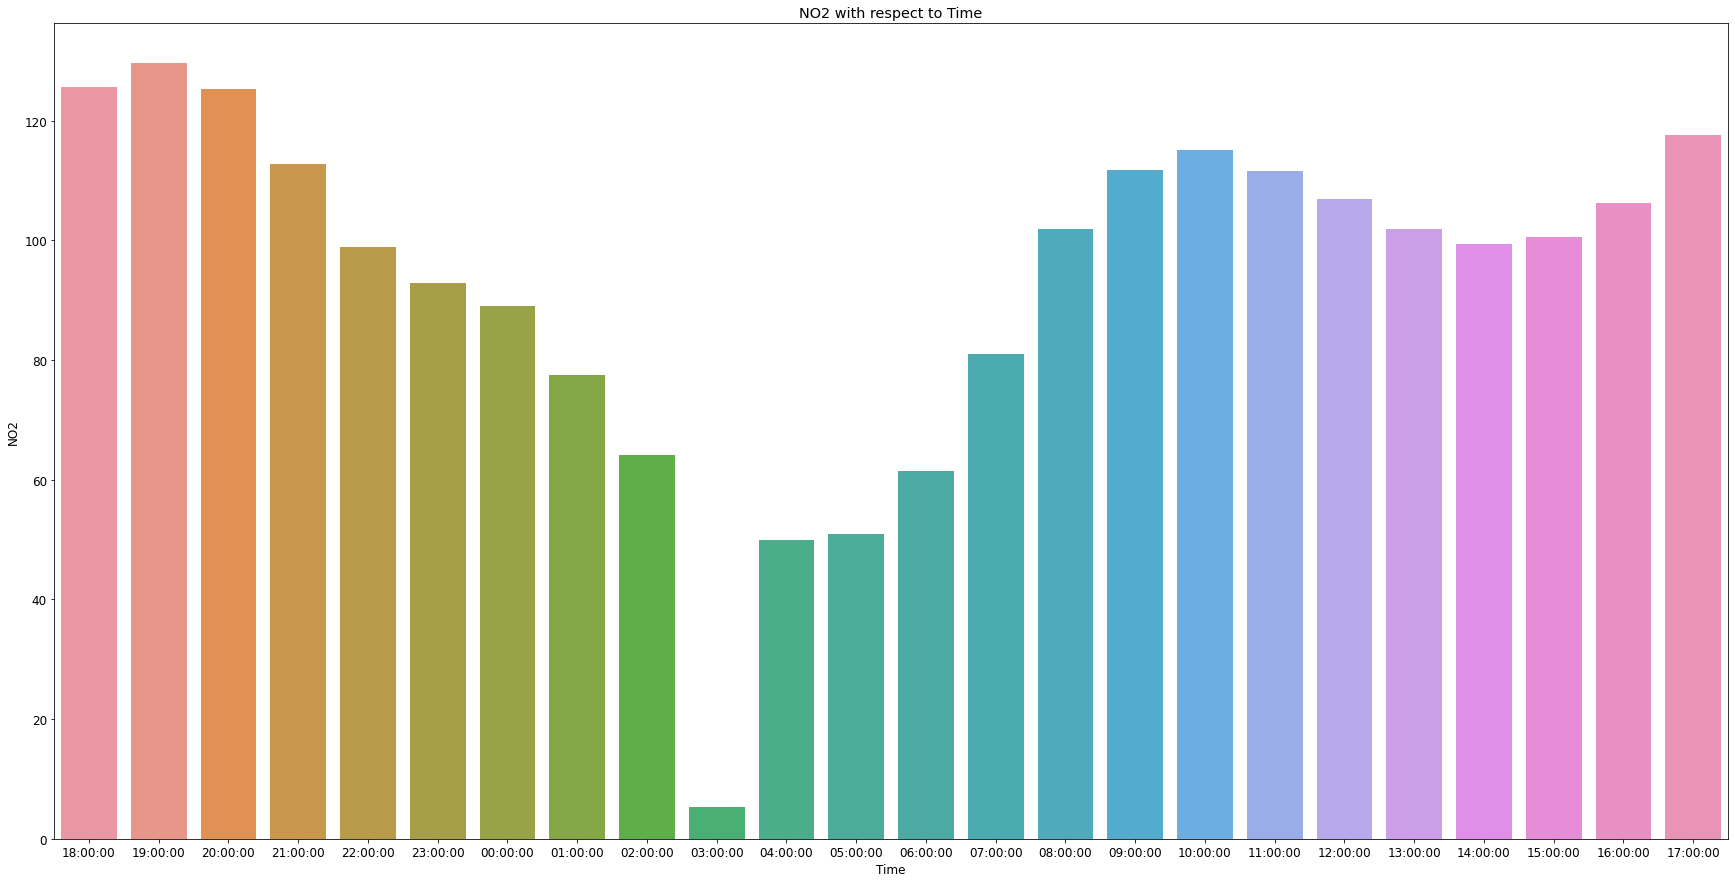

In [33]:
plt.figure(figsize=(30,15))
sns.barplot(x='Time',y='NO2',data=data_1, ci=False)
plt.xlabel('Time')
plt.ylabel('NO2')
plt.title("NO2 with respect to Time")

In [34]:
data_1=data_1.drop('Date',axis=1)
data_1=data_1.drop('Time',axis=1)
data_1=data_1.drop('Month',axis=1)

In [41]:
X=data_1.drop('NO2',axis=1)
y=data_1['NO2']

In [42]:
data_1.corr()

,CO_Concentrate,Tin_Oxide,Non_Metanic_Hydrocarbons,Benzene_Concentration,Titania_Concentration,NOx,Tungsten_Oxide_NOx,NO2,Tungsten_Oxide_NO2,Indium_Oxide,Temperature,Relative_Humidity,Absolute_Humidity
CO_Concentrate,1.000000,0.442803,0.249731,0.670790,0.533061,0.811449,-0.513070,0.723154,0.282080,0.586753,-0.079253,-0.018418,-0.092964
Tin_Oxide,0.442803,1.000000,0.213250,0.786143,0.922093,0.356291,-0.075630,0.284508,0.823505,0.886880,0.300359,0.417492,0.403123
Non_Metanic_Hydrocarbons,0.249731,0.213250,1.000000,0.198346,0.170037,-0.003611,-0.033366,0.099541,0.196691,0.155224,-0.025205,-0.020121,-0.071580
Benzene_Concentration,0.670790,0.786143,0.198346,1.000000,0.926265,0.543665,-0.457762,0.402581,0.734014,0.862751,0.275852,0.074847,0.261013
Titania_Concentration,0.533061,0.922093,0.170037,0.926265,1.000000,0.419047,-0.240806,0.334108,0.855763,0.903060,0.400031,0.215377,0.393508
NOx,0.811449,0.356291,-0.003611,0.543665,0.419047,1.000000,-0.514602,0.795888,0.068429,0.553223,-0.268778,0.079334,-0.210622
Tungsten_Oxide_NOx,-0.513070,-0.075630,-0.033366,-0.457762,-0.240806,-0.514602,1.000000,-0.440202,-0.002102,-0.352407,0.092534,0.223613,0.068493
NO2,0.723154,0.284508,0.099541,0.402581,0.334108,0.795888,-0.440202,1.000000,0.010185,0.439057,-0.195749,-0.125245,-0.324221
Tungsten_Oxide_NO2,0.282080,0.823505,0.196691,0.734014,0.855763,0.068429,-0.002102,0.010185,1.000000,0.694715,0.641916,0.291896,0.719606
Indium_Oxide,0.586753,0.886880,0.155224,0.862751,0.903060,0.553223,-0.352407,0.439057,0.694715,1.000000,0.149302,0.318989,0.259548


<h3> Forward Feature Selection</h3>

In [43]:
lr = LinearRegression()

In [46]:
sfs = SFS(lr, 
          k_features='best', 
          forward=True, 
          verbose=2,
          floating=False, 
          scoring='r2',
          cv=5)
sfs=sfs.fit(X,y)
print("Selected Features :", sfs.k_feature_names_)
print("Selected Features ID :", sfs.k_feature_idx_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2022-02-21 13:13:35] Features: 1/12 -- score: 0.32793311721687285[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2022-02-21 13:13:35] Features: 2/12 -- score: 0.39749209796875845[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-02-21 13:13:35] Features: 3/12 -- score: 0.3967716640594448[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

Selected Features : ('CO_Concentrate', 'Tin_Oxide', 'Benzene_Concentration', 'NOx', 'Indium_Oxide', 'Relative_Humidity')
Selected Features ID : (0, 1, 3, 5, 8, 10)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2022-02-21 13:13:36] Features: 11/12 -- score: 0.412045470595663[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-02-21 13:13:36] Features: 12/12 -- score: 0.37886605973265974

In [47]:
df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(5,)","[0.5397341674228304, 0.36220459984394493, 0.32...",0.327933,"(NOx,)",0.205674,0.160021,0.0800105
2,"(5, 10)","[0.5657521629389848, 0.5237271733067674, 0.385...",0.397492,"(NOx, Relative_Humidity)",0.193965,0.150911,0.0754557
3,"(1, 5, 10)","[0.6018215269916891, 0.5646715298172253, 0.331...",0.396772,"(Tin_Oxide, NOx, Relative_Humidity)",0.209659,0.163122,0.0815611
4,"(1, 3, 5, 10)","[0.6067597320947469, 0.38588526282342817, 0.45...",0.428365,"(Tin_Oxide, Benzene_Concentration, NOx, Relati...",0.148366,0.115434,0.0577169
5,"(0, 1, 3, 5, 10)","[0.7070344831804819, 0.39194102472776116, 0.54...",0.458568,"(CO_Concentrate, Tin_Oxide, Benzene_Concentrat...",0.190794,0.148444,0.074222
6,"(0, 1, 3, 5, 8, 10)","[0.7030324660872511, 0.4131108866205241, 0.545...",0.472959,"(CO_Concentrate, Tin_Oxide, Benzene_Concentrat...",0.17442,0.135705,0.0678524
7,"(0, 1, 2, 3, 5, 8, 10)","[0.7030324660874951, 0.3611904674759331, 0.551...",0.4647,"(CO_Concentrate, Tin_Oxide, Non_Metanic_Hydroc...",0.182035,0.141629,0.0708147
8,"(0, 1, 2, 3, 4, 5, 8, 10)","[0.6862371133329732, 0.3948014775063129, 0.549...",0.45382,"(CO_Concentrate, Tin_Oxide, Non_Metanic_Hydroc...",0.184976,0.143918,0.071959
9,"(0, 1, 2, 3, 4, 5, 6, 8, 10)","[0.6828432702610835, 0.3949230557921979, 0.481...",0.442655,"(CO_Concentrate, Tin_Oxide, Non_Metanic_Hydroc...",0.171891,0.133737,0.0668687
10,"(0, 1, 2, 3, 4, 5, 6, 8, 10, 11)","[0.7248253309057372, 0.09025755978169803, 0.55...",0.425139,"(CO_Concentrate, Tin_Oxide, Non_Metanic_Hydroc...",0.272444,0.21197,0.105985


<h3> Backward Feature Selection</h3>

In [48]:
sfs_1 = SFS(lr, 
          k_features='best', 
          forward=False, 
          floating=False, 
          verbose=2,
          scoring='r2',
          cv=5)
sfs_1=sfs_1.fit(X,y)
print("Selected Features :", sfs_1.k_feature_names_)
print("Selected Features ID :", sfs_1.k_feature_idx_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished

[2022-02-21 13:14:37] Features: 11/1 -- score: 0.42765009501698314[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s finished

[2022-02-21 13:14:37] Features: 10/1 -- score: 0.43810436453872875[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2022-02-21 13:14:38] Features: 9/1 -- score: 0.44612389138186365[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

Selected Features : ('CO_Concentrate', 'Benzene_Concentration', 'Titania_Concentration', 'NOx', 'Indium_Oxide', 'Relative_Humidity')
Selected Features ID : (0, 3, 4, 5, 8, 10)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2022-02-21 13:14:38] Features: 4/1 -- score: 0.4091347544570175[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2022-02-21 13:14:38] Features: 3/1 -- score: 0.35444315822563244[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2022-02-21 13:14:38] Features: 2/1 -- score: 0.39749209796875845[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2

<h3> Step-wise Feature Selection</h3>

In [50]:
sfs_2 = SFS(lr, 
          k_features='best', 
          forward=True, 
          floating=True, 
          scoring='r2',
          verbose=2,
          cv=5)
sfs=sfs.fit(X,y)
print("Selected Features :", sfs.k_feature_names_)
print("Selected Features ID :", sfs.k_feature_idx_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2022-02-21 13:15:37] Features: 1/12 -- score: 0.32793311721687285[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2022-02-21 13:15:37] Features: 2/12 -- score: 0.39749209796875845[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-02-21 13:15:37] Features: 3/12 -- score: 0.3967716640594448[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

Selected Features : ('CO_Concentrate', 'Tin_Oxide', 'Benzene_Concentration', 'NOx', 'Indium_Oxide', 'Relative_Humidity')
Selected Features ID : (0, 1, 3, 5, 8, 10)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-02-21 13:15:38] Features: 12/12 -- score: 0.37886605973265974

<h3> Creating a new Dataframe using the features selected</h3>

<p> Forward, backward and step-wise feature selections gave the same best features. So I have taken features selected by forward selection and created a new dataframe using them below</p>

In [51]:
features=list(sfs.k_feature_names_)
print(features)

['CO_Concentrate', 'Tin_Oxide', 'Benzene_Concentration', 'NOx', 'Indium_Oxide', 'Relative_Humidity']


In [52]:
new_data=data_1[features]
new_data['NO2']=data_1['NO2']
new_data

c:\users\vishnu priya\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CO_Concentrate,Tin_Oxide,Benzene_Concentration,NOx,Indium_Oxide,Relative_Humidity,NO2
0,2.6,1360.00,11.881723,166.0,1267.50,48.875001,113.0
1,2.0,1292.25,9.397165,103.0,972.25,47.700000,92.0
2,2.2,1402.00,8.997817,131.0,1074.00,53.975000,114.0
3,2.2,1375.50,9.228796,172.0,1203.25,60.000000,122.0
4,1.6,1272.25,6.518224,131.0,1110.00,59.575001,116.0
...,...,...,...,...,...,...,...
9352,3.1,1314.25,13.529605,471.7,1728.50,29.250000,189.8
9353,2.4,1162.50,11.355157,353.3,1269.00,23.725000,179.2
9354,2.4,1142.00,12.374538,293.0,1092.00,18.350000,174.7
9355,2.1,1002.50,9.547187,234.5,769.75,13.550000,155.7


<h3> Splitting the data into train and test</h3>

In [53]:
X_new=new_data.drop('NO2',axis=1)
y_new=new_data['NO2']

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.2)

<h3>Linear Regression</h3>

In [56]:
lr.fit(X_train,y_train)
predict_lr=lr.predict(X_test)
x=r2_score(y_test,predict_lr)
print("R2",x)
adjusted_r2=calculate_adj_r2(x,X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)
scores=cross_val_score(lr,X_train,y_train,scoring="r2",cv=crossvalidation,n_jobs=1)
print("Folds:"+str(len(scores))+",MSE:"+str(np.mean(np.abs(scores)))+",STD"+str(np.std(scores)))

R2 0.7409648928470239
Adj R2 1.064741475485335
Folds:10,MSE:0.7288155994163037,STD0.014039962317314646


<h3>Ridge Regression</h3>

In [57]:
model_cv=RidgeCV(alphas=np.arange(.1,1,0.01),cv=5,scoring='r2')
model_cv.fit(X_train,y_train)
print("Best Alpha",model_cv.alpha_)
y_pred=model_cv.predict(X_test)
x=r2_score(y_test,y_pred)
print("R2",x)
adjusted_r2=calculate_adj_r2(x,X_test.count()[0],len(X_new))
print("Adj R2",adjusted_r2)

Best Alpha 0.9899999999999995
R2 0.7409660836331564
Adj R2 1.0647411778683362


In [58]:
ridge=Ridge()
ridge.fit(X_train,y_train)
predict_ridge=ridge.predict(X_test)
x=r2_score(y_test, predict_ridge)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)

R2 0.7409660956467501
Adj R2 1.06474117486574


<h3>Lasso Regression</h3>

In [59]:
lasso=Lasso()
lasso.fit(X_train,y_train)
predict_lasso=lasso.predict(X_test)
x=r2_score(y_test, predict_lasso)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)

R2 0.7413002268543619
Adj R2 1.0646576643809096


In [60]:
from sklearn.linear_model import LassoCV
model_l_cv = LassoCV(cv=5, random_state=0, max_iter=10000)
model_l_cv.fit(X_train, y_train)
print(model_l_cv.alpha_)
lasso_best = Lasso(alpha=model_l_cv.alpha_)
lasso_best.fit(X_train, y_train)
Y_Pred=lasso_best.predict(X_test)

x=r2_score(y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)

11.942950309583782
R2 0.7195064365162228
Adj R2 1.0701046563289003


<h3> Quadratic Regression</h3>

In [62]:
quadratic=PolynomialFeatures(degree=2)
quadratic_features=quadratic.fit_transform(X_train)
quadratic.fit(quadratic_features,y_train)
quad_model=LinearRegression()
quad_model.fit(quadratic_features,y_train)
predict_quad=quad_model.predict(quadratic.fit_transform(X_test))
x=r2_score(y_test, predict_quad)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)

R2 0.8389213177239685
Adj R2 1.0402589119073544


<h3>Symbolic Regression</h3>

In [63]:
symbolic = SymbolicRegressor(population_size=5000,
                           generations=10, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
symbolic.fit(X_train, y_train)
score_gp = symbolic.score(X_train, y_train)
print(score_gp)
Y_Pred=symbolic.predict(X_test)
x=r2_score(y_test, Y_Pred)
print("R2",x)
adjusted_r2 = calculate_adj_r2(x, X_test.count()[0],len(X))
print("Adj R2",adjusted_r2)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    28.56      1.43483e+29       15          40.4881          41.1848      1.19m
   1     9.22      1.51495e+13       15           33.396          34.3272     44.92s
   2     8.86      3.76474e+07       31          30.9643            30.51     37.90s
   3    12.51      8.54454e+14       37          30.0186           30.371     36.45s
   4    20.64      1.35221e+10       41           26.054          26.5033     34.59s
   5    27.74      2.85167e+09       43          21.2927          22.2134     30.44s
   6    32.90      3.86123e+12       43          21.3306          21.8726     24.35s
   7    38.87      3.41184e+10       63          21.0853          20.3401     17.47s
   8    47.94      5.93963e+07       83          18.8649          19.0929  